<h1><center>Profil Dicoding</center></h1><hr>
<p> Nama  : Sarah Salsabila </p>
<p> Email : m314v4331@dicoding.org</p>
<p> Alamat: Karawang , Jawabarat</p>

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [2]:
import os
os.environ['KAGGLE_CONFIG_DIR'] ="/content/gdrive/MyDrive/Colab Notebooks/kaggle"

In [3]:
!pwd

/content


In [4]:
%cd /content/gdrive/MyDrive/Colab Notebooks/kaggle
!pwd

/content/gdrive/MyDrive/Colab Notebooks/kaggle
/content/gdrive/MyDrive/Colab Notebooks/kaggle


In [5]:
!kaggle datasets download -d emmarex/plantdisease

 99% 654M/658M [00:09<00:00, 89.1MB/s]
100% 658M/658M [00:09<00:00, 74.2MB/s]


In [6]:
!unzip
#Author : Sarah Salsabila (https://github.com/sarahsalsabila01)

UnZip 6.00 of 20 April 2009, by Debian. Original by Info-ZIP.

Usage: unzip [-Z] [-opts[modifiers]] file[.zip] [list] [-x xlist] [-d exdir]
  Default action is to extract files in list, except those in xlist, to exdir;
  file[.zip] may be a wildcard.  -Z => ZipInfo mode ("unzip -Z" for usage).

  -p  extract files to pipe, no messages     -l  list files (short format)
  -f  freshen existing files, create none    -t  test compressed archive data
  -u  update files, create if necessary      -z  display archive comment only
  -v  list verbosely/show version info       -T  timestamp archive to latest
  -x  exclude files that follow (in xlist)   -d  extract files into exdir
modifiers:
  -n  never overwrite existing files         -q  quiet mode (-qq => quieter)
  -o  overwrite files WITHOUT prompting      -a  auto-convert any text files
  -j  junk paths (do not make directories)   -aa treat ALL files as text
  -U  use escapes for all non-ASCII Unicode  -UU ignore any Unicode fields
  -C  mat

In [7]:
!unzip -qq plantdisease.zip
print('Done sar!')

Done sar!


In [8]:
import os
plantvilage = os.path.join('/content/gdrive/MyDrive/Colab Notebooks/kaggle/PlantVillage')
print(os.listdir(plantvilage))

['Pepper__bell___Bacterial_spot', 'Pepper__bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Tomato_Bacterial_spot', 'Tomato_Early_blight', 'Tomato_Late_blight', 'Tomato_Leaf_Mold', 'Tomato_Septoria_leaf_spot', 'Tomato_Spider_mites_Two_spotted_spider_mite', 'Tomato__Target_Spot', 'Tomato__Tomato_YellowLeaf__Curl_Virus', 'Tomato__Tomato_mosaic_virus', 'Tomato_healthy']


In [9]:
len(os.listdir(plantvilage))

15

In [10]:
plantvilage=['Pepper__bell___Bacterial_spot', 'Pepper__bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Tomato_Bacterial_spot', 'Tomato_Early_blight', 'Tomato_Late_blight', 'Tomato_Leaf_Mold', 'Tomato_Septoria_leaf_spot', 'Tomato_Spider_mites_Two_spotted_spider_mite', 'Tomato__Target_Spot', 'Tomato__Tomato_YellowLeaf__Curl_Virus', 'Tomato__Tomato_mosaic_virus', 'Tomato_healthy']

In [11]:
for plantdisease in plantvilage:
    print(f'{plantdisease} images: ', len(os.listdir(f'/content/gdrive/MyDrive/Colab Notebooks/kaggle/PlantVillage/{plantdisease}')))

Pepper__bell___Bacterial_spot images:  997
Pepper__bell___healthy images:  1478
Potato___Early_blight images:  1000
Potato___Late_blight images:  1000
Potato___healthy images:  152
Tomato_Bacterial_spot images:  2127
Tomato_Early_blight images:  1000
Tomato_Late_blight images:  1909
Tomato_Leaf_Mold images:  952
Tomato_Septoria_leaf_spot images:  1771
Tomato_Spider_mites_Two_spotted_spider_mite images:  1676
Tomato__Target_Spot images:  1404
Tomato__Tomato_YellowLeaf__Curl_Virus images:  3209
Tomato__Tomato_mosaic_virus images:  373
Tomato_healthy images:  1591


In [3]:
import tensorflow as tf
import keras_preprocessing
from keras_preprocessing import image             
from keras_preprocessing.image import ImageDataGenerator  

In [4]:
BASIS_DIR = "/content/gdrive/MyDrive/Colab Notebooks/kaggle/PlantVillage"
#Author : Sarah Salsabila (https://github.com/sarahsalsabila01)
training_datagen = ImageDataGenerator(
      rescale = 1./255, 
	    rotation_range=40,     
      width_shift_range=0.2,  
      height_shift_range=0.2,
      shear_range=0.2, 
      zoom_range=0.2,  
      horizontal_flip=True,  
      fill_mode='nearest', 
      validation_split=0.2  
      )

In [5]:
train_generator = training_datagen.flow_from_directory( 
	BASIS_DIR,  
	target_size=(150,150), 
	class_mode='categorical',  
  shuffle=True,                                                                  
  subset='training'  
  )

validation_generator = training_datagen.flow_from_directory(      
	BASIS_DIR,     
	target_size=(150,150),      
	class_mode='categorical',
  shuffle=True,
  subset='validation' 
  )

Found 16516 images belonging to 15 classes.
Found 4122 images belonging to 15 classes.


In [6]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.92 and logs.get('val_accuracy')>0.92):
      print("\nAccuracy asudah lebih dari 92%,yeay stop training!")
      self.model.stop_training = True

callbacks = myCallback()

In [7]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5), 
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(15, activation='softmax')
])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 64)      1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 128)       73856     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 128)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       147584    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

In [8]:
model.compile(
    optimizer='adam', 
    loss='categorical_crossentropy', 
    metrics=['accuracy']
)

history = model.fit(
    train_generator,
    epochs=50,
    verbose=1,
    validation_data=validation_generator,
    callbacks=[callbacks]
)

Epoch 1/50
517/517 [==============================] - 202s 384ms/step - loss: 2.2516 - accuracy: 0.2634 - val_loss: 1.9026 - val_accuracy: 0.3574
Epoch 2/50
517/517 [==============================] - 197s 381ms/step - loss: 1.6509 - accuracy: 0.4570 - val_loss: 1.3088 - val_accuracy: 0.5771
Epoch 3/50
517/517 [==============================] - 201s 390ms/step - loss: 1.1583 - accuracy: 0.6115 - val_loss: 0.9633 - val_accuracy: 0.6689
Epoch 4/50
517/517 [==============================] - 194s 375ms/step - loss: 0.9301 - accuracy: 0.6858 - val_loss: 0.7255 - val_accuracy: 0.7455
Epoch 5/50
517/517 [==============================] - 196s 379ms/step - loss: 0.7333 - accuracy: 0.7464 - val_loss: 0.5495 - val_accuracy: 0.8079
Epoch 6/50
517/517 [==============================] - 198s 383ms/step - loss: 0.6099 - accuracy: 0.7934 - val_loss: 0.4555 - val_accuracy: 0.8445
Epoch 7/50
517/517 [==============================] - 196s 380ms/step - loss: 0.5269 - accuracy: 0.8219 - val_loss: 0.3795 -

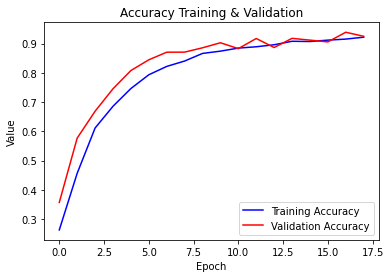

In [10]:
#membuat visualisasi grafik untuk accuracy pada saat Training model 
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
#Author : Sarah Salsabila (https://github.com/sarahsalsabila01)

plt.plot(history.history['accuracy'], label='Training Accuracy', color='blue')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='red')
plt.title('Accuracy Training & Validation')
plt.ylabel('Value')
plt.xlabel('Epoch')
plt.legend(loc="lower right")
plt.show()

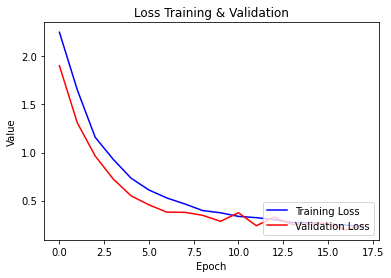

In [11]:
#membuat visualisasi grafik untuk loss pada saat Training model 
plt.plot(history.history['loss'], label='Training Loss', color='blue')
plt.plot(history.history['val_loss'], label='Validation Loss', color = 'red')
plt.title('Loss Training & Validation')
plt.ylabel('Value')
plt.xlabel('Epoch')
plt.legend(loc="lower right")
plt.show()

In [13]:
# Konversi model.
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

INFO:tensorflow:Assets written to: /tmp/tmpihdjn7v3/assets


In [14]:
with tf.io.gfile.GFile('model.tflite', 'wb') as f:
  f.write(tflite_model)

In [18]:
def predict_image(image_upload, model = model):
  im = image_upload
  im_array = np.asarray(im)
  im_array = im_array*(1/225)
  im_input = tf.reshape(im_array, shape = [1, 150, 150, 3])

  predict_array = model.predict(im_input)[0]

  import pandas as pd
  df = pd.DataFrame(predict_array)
  df = df.rename({0:'Kemungkinan'}, axis = 'columns')
  leaf = ['Pepper__bell___Bacterial_spot', 'Pepper__bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight',
          'Potato___healthy', 'Tomato_Bacterial_spot', 'Tomato_Early_blight', 'Tomato_Late_blight', 'Tomato_Leaf_Mold',
          'Tomato_Septoria_leaf_spot', 'Tomato_Spider_mites_Two_spotted_spider_mite', 'Tomato__Target_Spot', 'Tomato__Tomato_YellowLeaf__Curl_Virus',
          'Tomato__Tomato_mosaic_virus', 'Tomato_healthy']
  df['Tipe'] = leaf
  df = df[['Tipe', 'Kemungkinan']]

  predict_label = np.argmax(model.predict(im_input))

  if predict_label == 0:
      predict_daun = 'Pepper__bell___Bacterial_spot'
  elif predict_label == 1:
      predict_daun = 'Pepper__bell___healthy'
  elif predict_label == 2:
      predict_daun = 'Potato___Early_blight'
  elif predict_label == 3:
      predict_daun = 'Potato___Late_blight'
  elif predict_label == 4:
      predict_daun = 'Potato___healthy'
  elif predict_label == 5:
      predict_daun = 'Tomato_Bacterial_spot'
  elif predict_label == 6:
      predict_daun = 'Tomato_Early_blight'
  elif predict_label == 7:
      predict_daun = 'Tomato_Late_blight'
  elif predict_label == 8:
      predict_daun = 'Tomato_Leaf_Mold'
  elif predict_label == 9:
      predict_daun = 'Tomato_Septoria_leaf_spot'
  elif predict_label == 10:
      predict_daun = 'Tomato_Spider_mites_Two_spotted_spider_mite'
  elif predict_label == 11:
      predict_daun = 'Tomato__Target_Spot'
  elif predict_label == 12:
      predict_daun = 'Tomato__Tomato_YellowLeaf__Curl_Virus'
  elif predict_label == 13:
      predict_daun = 'Tomato__Tomato_mosaic_virus'
  else:
      predict_daun = 'Tomato_healthy'

  return predict_daun, df

In [16]:
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
import numpy as np
#Author : Sarah Salsabila (https://github.com/sarahsalsabila01)

def predict():
  testDaun = files.upload()

  for fn in testDaun.keys():
    path = fn
    img = image.load_img(path, target_size=(150,150))
    imgplot = plt.imshow(img)
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    img = np.vstack([x])

  label, df = predict_image(img)

  print('\n')
  plt.show()
  print("\nPada Foto Daun terdeteksi bahwa Tanaman ini Merupakan " + label)
  print('\n')
  print(df)
  print('\n')

Saving moad.JPG to moad (1).JPG




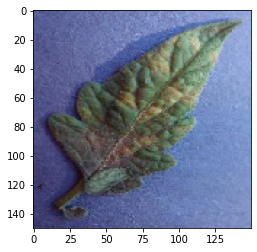


Pada Foto Daun terdeteksi bahwa Tanaman ini Merupakan Tomato_Leaf_Mold


                                           Tipe   Kemungkinan
0                 Pepper__bell___Bacterial_spot  3.533013e-20
1                        Pepper__bell___healthy  1.107413e-25
2                         Potato___Early_blight  3.832381e-16
3                          Potato___Late_blight  6.730942e-23
4                              Potato___healthy  0.000000e+00
5                         Tomato_Bacterial_spot  3.730833e-22
6                           Tomato_Early_blight  9.596045e-18
7                            Tomato_Late_blight  3.196961e-08
8                              Tomato_Leaf_Mold  1.000000e+00
9                     Tomato_Septoria_leaf_spot  1.484254e-08
10  Tomato_Spider_mites_Two_spotted_spider_mite  1.922835e-16
11                          Tomato__Target_Spot  9.738932e-21
12        Tomato__Tomato_YellowLeaf__Curl_Virus  8.701551e-31
13                  Tomato__Tomato_mosaic_virus  2.900716e

In [19]:
predict()

Saving poer.JPG to poer.JPG




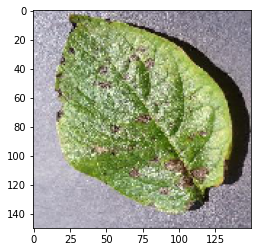


Pada Foto Daun terdeteksi bahwa Tanaman ini Merupakan Potato___Early_blight


                                           Tipe   Kemungkinan
0                 Pepper__bell___Bacterial_spot  5.634571e-10
1                        Pepper__bell___healthy  3.295606e-17
2                         Potato___Early_blight  9.999907e-01
3                          Potato___Late_blight  1.580470e-11
4                              Potato___healthy  2.514931e-19
5                         Tomato_Bacterial_spot  2.569983e-23
6                           Tomato_Early_blight  1.839852e-10
7                            Tomato_Late_blight  9.247232e-06
8                              Tomato_Leaf_Mold  8.439139e-21
9                     Tomato_Septoria_leaf_spot  2.697136e-10
10  Tomato_Spider_mites_Two_spotted_spider_mite  4.821362e-17
11                          Tomato__Target_Spot  1.145734e-16
12        Tomato__Tomato_YellowLeaf__Curl_Virus  1.885681e-26
13                  Tomato__Tomato_mosaic_virus  6.28

In [20]:
predict()